In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
"""Attribute Information:

Age: age of the patient [years]
Sex: sex of the patient [M: Male, F: Female]
ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
RestingBP: resting blood pressure [mm Hg]
Cholesterol: serum cholesterol [mm/dl]
FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
Oldpeak: oldpeak = ST [Numeric value measured in depression]
ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
HeartDisease: output class [1: heart disease, 0: Normal]"""

"Attribute Information:\n\nAge: age of the patient [years]\nSex: sex of the patient [M: Male, F: Female]\nChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]\nRestingBP: resting blood pressure [mm Hg]\nCholesterol: serum cholesterol [mm/dl]\nFastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]\nRestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]\nMaxHR: maximum heart rate achieved [Numeric value between 60 and 202]\nExerciseAngina: exercise-induced angina [Y: Yes, N: No]\nOldpeak: oldpeak = ST [Numeric value measured in depression]\nST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]\nHeartDisease: output class [1: heart disease, 0: Normal]"

In [4]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
df.describe(include ='all')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.510893,NaN,NaN,132.396514,198.799564,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,9.432617,NaN,NaN,18.514154,109.384145,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,173.250000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


In [7]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [8]:
df.duplicated().sum()

0

Text(0.5, 1.0, 'Count of people with and without HeartDisease')

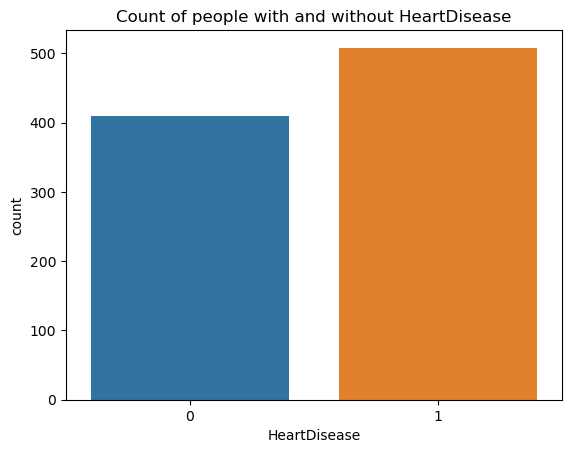

In [9]:
sns.countplot(x='HeartDisease',data=df)
plt.title('Count of people with and without HeartDisease')

Text(0.5, 1.0, 'Distribution of Cholesterol Levels')

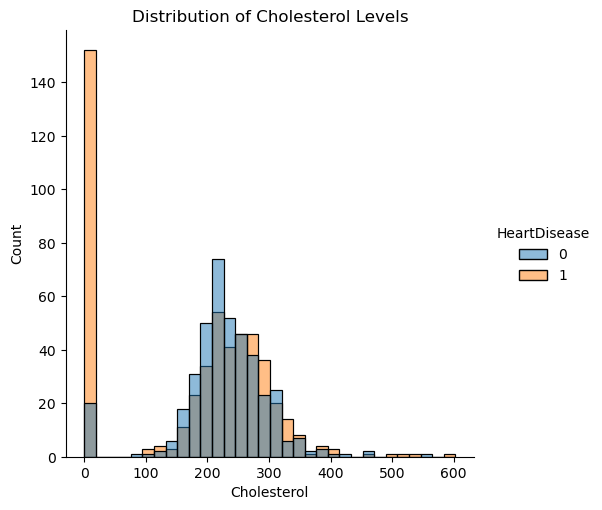

In [10]:
sns.displot(x='Cholesterol',data=df,hue='HeartDisease')
plt.title('Distribution of Cholesterol Levels')

In [11]:
df[(df['Cholesterol']==0)]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


In [12]:
df_fill = df.copy()
def fill_cholesterol(value):
    if value == 0:
        return df['Cholesterol'].mean()
    else:
        return value
df_fill['Cholesterol'] = df_fill['Cholesterol'].apply(fill_cholesterol)

In [113]:
df_fill.loc[[293,294,295,296,297]]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115.0,198.799564,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95.0,198.799564,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105.0,198.799564,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145.0,198.799564,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110.0,198.799564,1,ST,131,Y,1.4,Up,1


Text(0.5, 1.0, 'Distribution of Cholesterol Levels after filling')

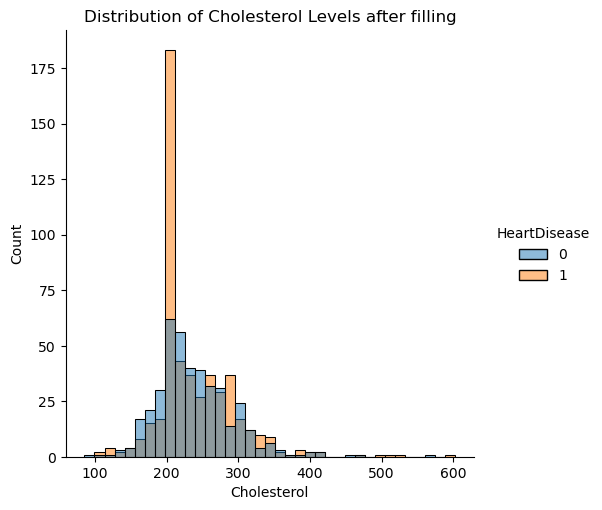

In [14]:
sns.displot(x='Cholesterol',data=df_fill,hue='HeartDisease')
plt.title('Distribution of Cholesterol Levels after filling')

Text(0.5, 1.0, 'Distribution of RestingBP')

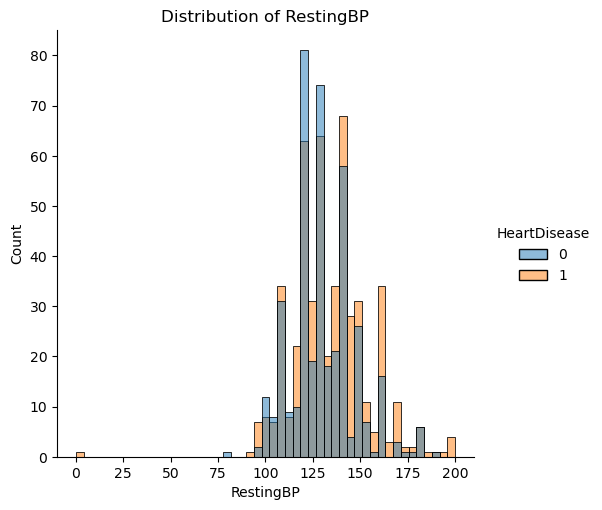

In [15]:
sns.displot(x='RestingBP',data=df_fill,hue='HeartDisease')
plt.title('Distribution of RestingBP')

In [16]:
df_fill[(df_fill['RestingBP']==0)]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,198.799564,0,Normal,155,N,1.5,Flat,1


In [17]:
df_fill.loc[449, 'RestingBP'] = df_fill['RestingBP'].mean()
df_fill.loc[449]

Age                       55
Sex                        M
ChestPainType            NAP
RestingBP         132.396514
Cholesterol       198.799564
FastingBS                  0
RestingECG            Normal
MaxHR                    155
ExerciseAngina             N
Oldpeak                  1.5
ST_Slope                Flat
HeartDisease               1
Name: 449, dtype: object

Text(0.5, 1.0, 'Distribution of RestingBP after filling')

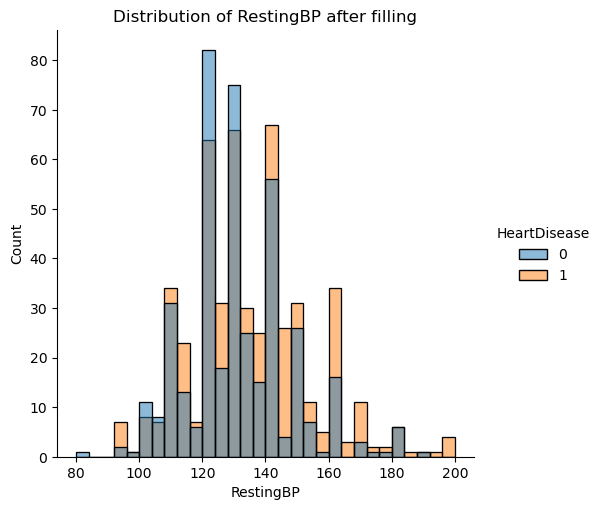

In [18]:
sns.displot(x='RestingBP',data=df_fill,hue='HeartDisease')
plt.title('Distribution of RestingBP after filling')

Text(0.5, 1.0, 'Distribution of Age')

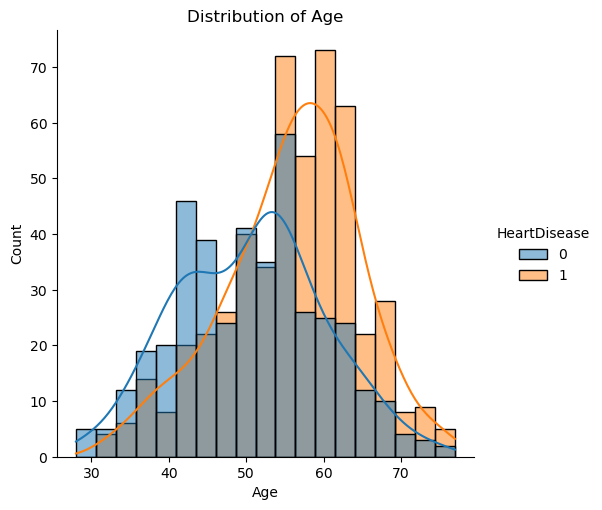

In [19]:
sns.displot(x='Age',data=df_fill,kde=True,hue='HeartDisease')
plt.title('Distribution of Age')

Text(0.5, 1.0, 'Gender & Heart Disease')

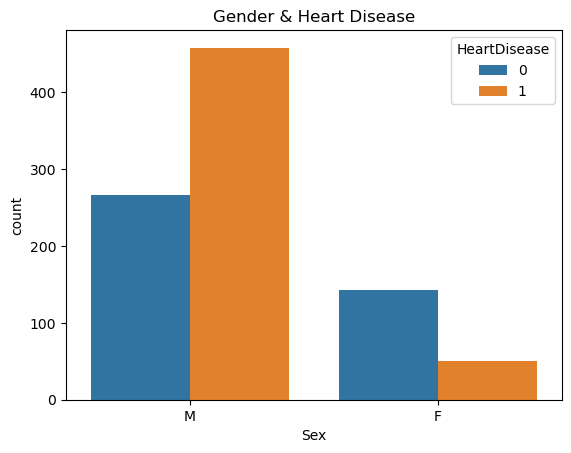

In [20]:
sns.countplot(x='Sex',data=df_fill,hue='HeartDisease')
plt.title('Gender & Heart Disease')

Text(0.5, 1.0, 'ChestPainType & Heart Disease')

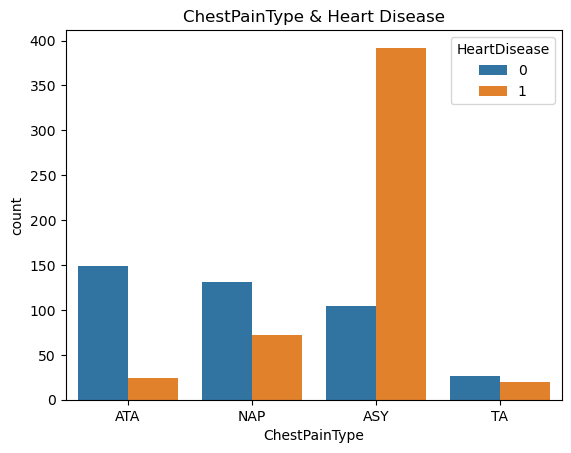

In [21]:
sns.countplot(x='ChestPainType',data=df_fill,hue='HeartDisease')
plt.title('ChestPainType & Heart Disease')

Text(0.5, 1.0, 'FastingBS & Heart Disease')

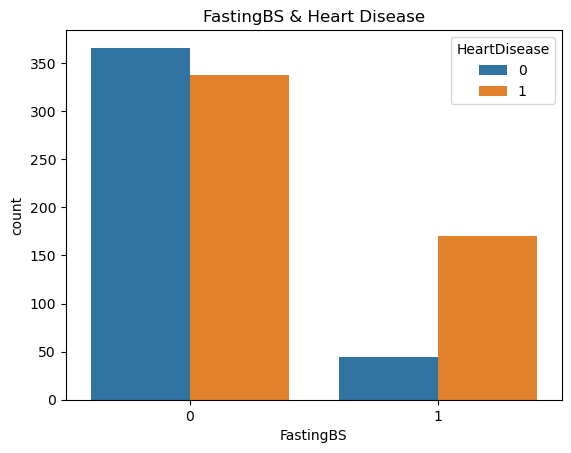

In [22]:
sns.countplot(x='FastingBS',hue='HeartDisease',data=df_fill)
plt.title('FastingBS & Heart Disease')# 1 - greater than 120; 0 - otherwise

<Figure size 960x640 with 0 Axes>

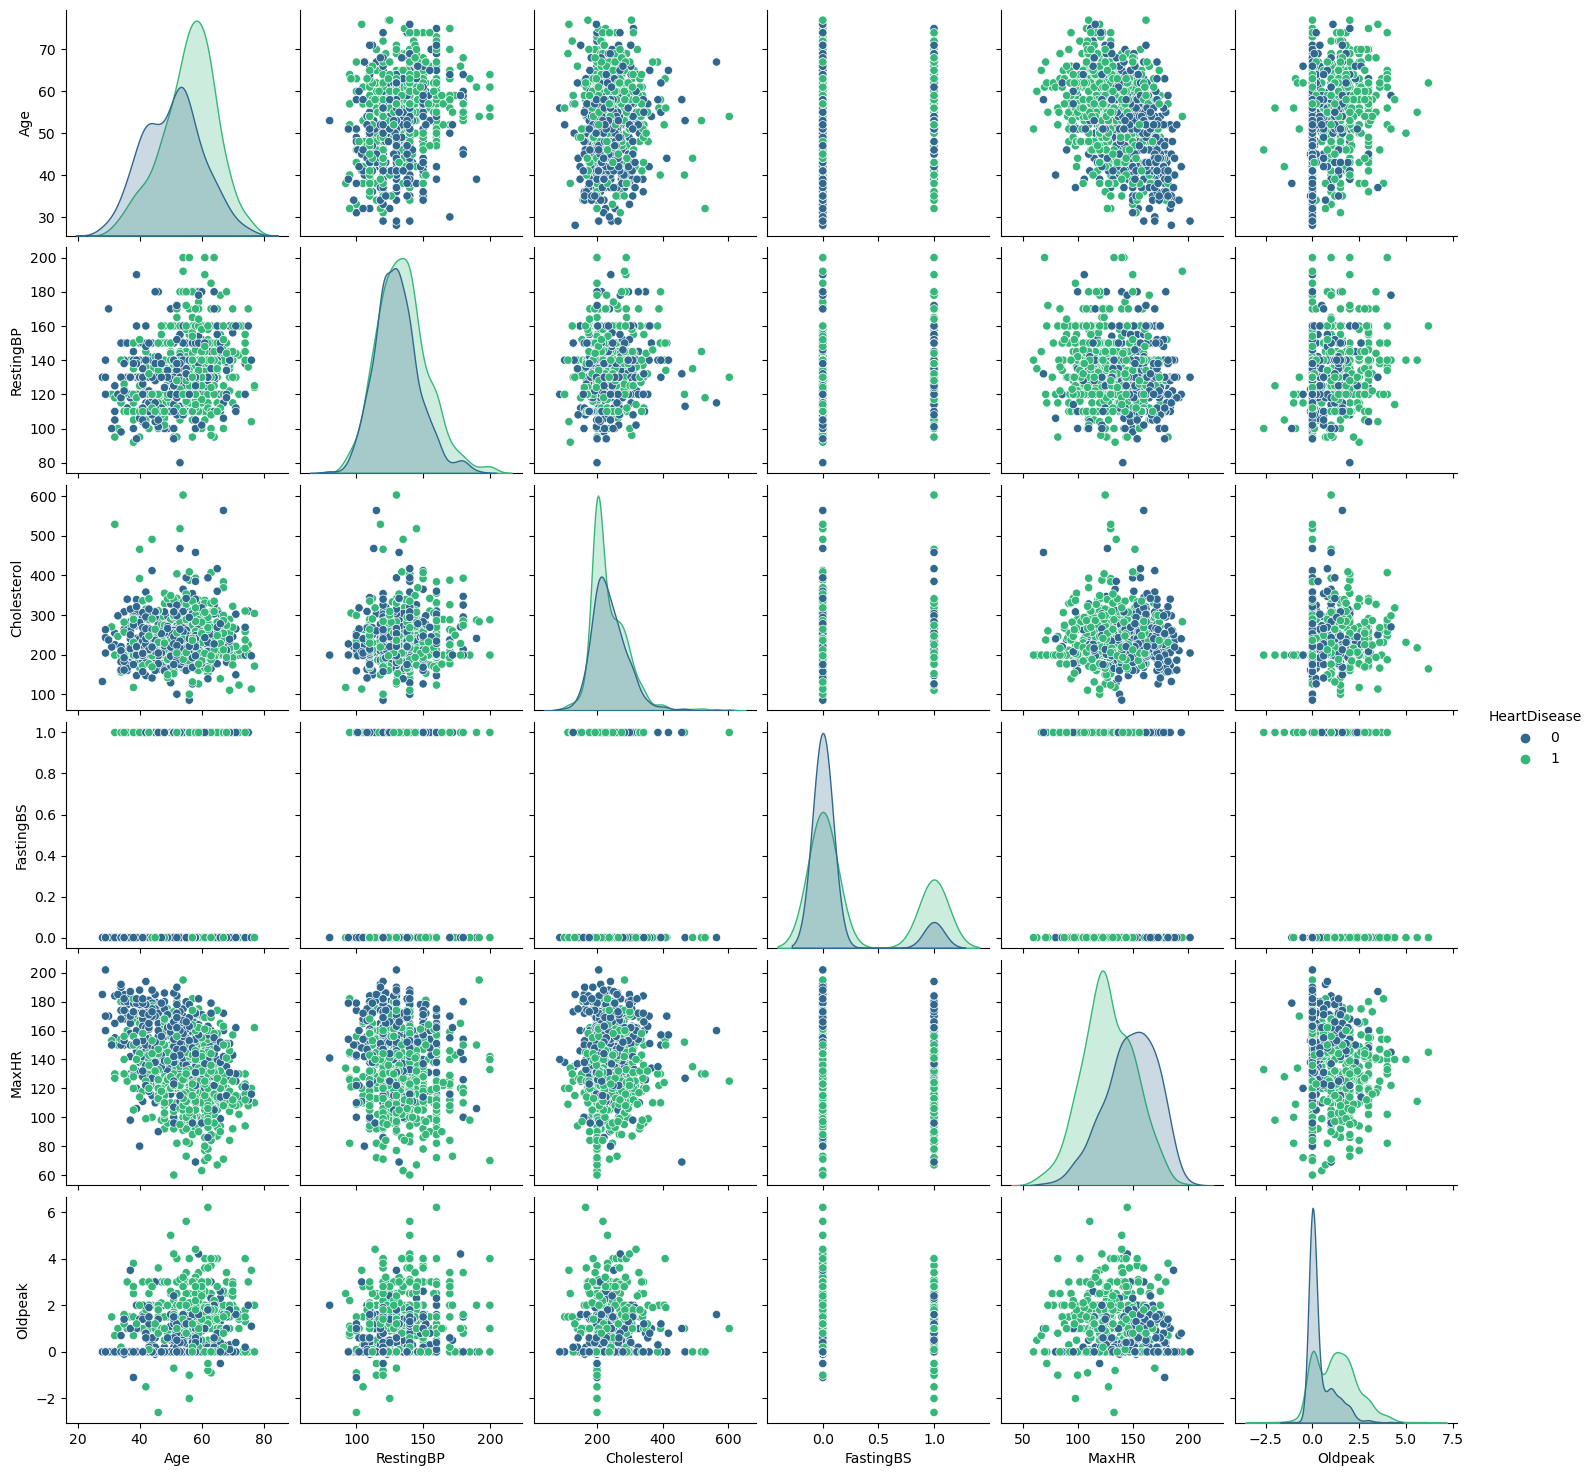

In [23]:
plt.figure(figsize=(12,8),dpi=80)
sns.pairplot(data=df_fill,hue='HeartDisease',palette='viridis')


Text(0.5, 1.0, 'Age vs Sex')

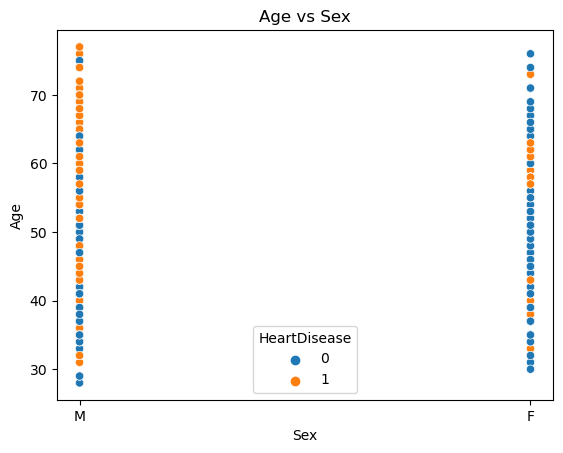

In [24]:
sns.scatterplot(y='Age',x='Sex',data=df_fill,hue='HeartDisease')
plt.title("Age vs Sex")

Text(0.5, 1.0, 'Age vs RestingBP')

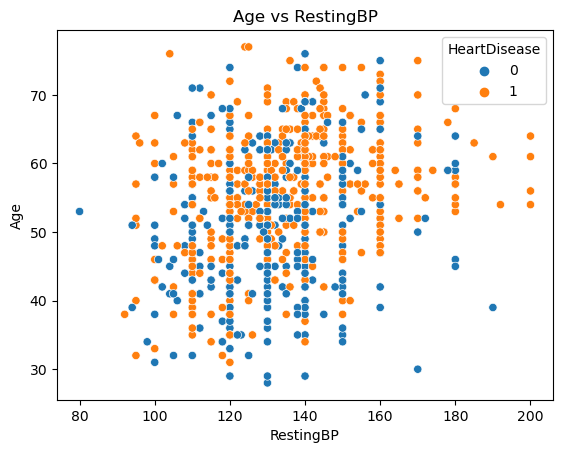

In [25]:
sns.scatterplot(x='RestingBP',y='Age',data=df_fill,hue='HeartDisease')
plt.title('Age vs RestingBP')

Text(0.5, 1.0, 'Age vs Cholesterol')

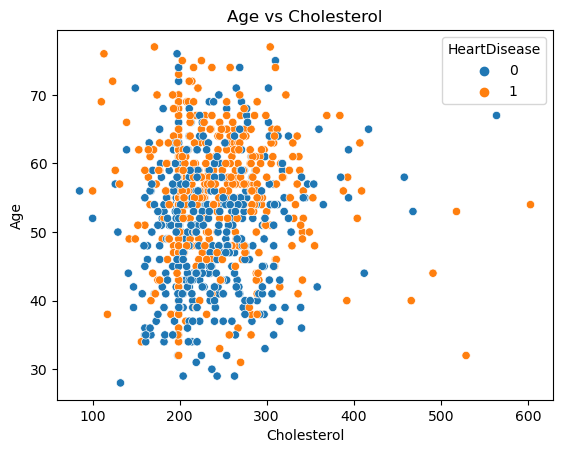

In [26]:
sns.scatterplot(x='Cholesterol',y='Age',data=df_fill,hue='HeartDisease')
plt.title('Age vs Cholesterol')

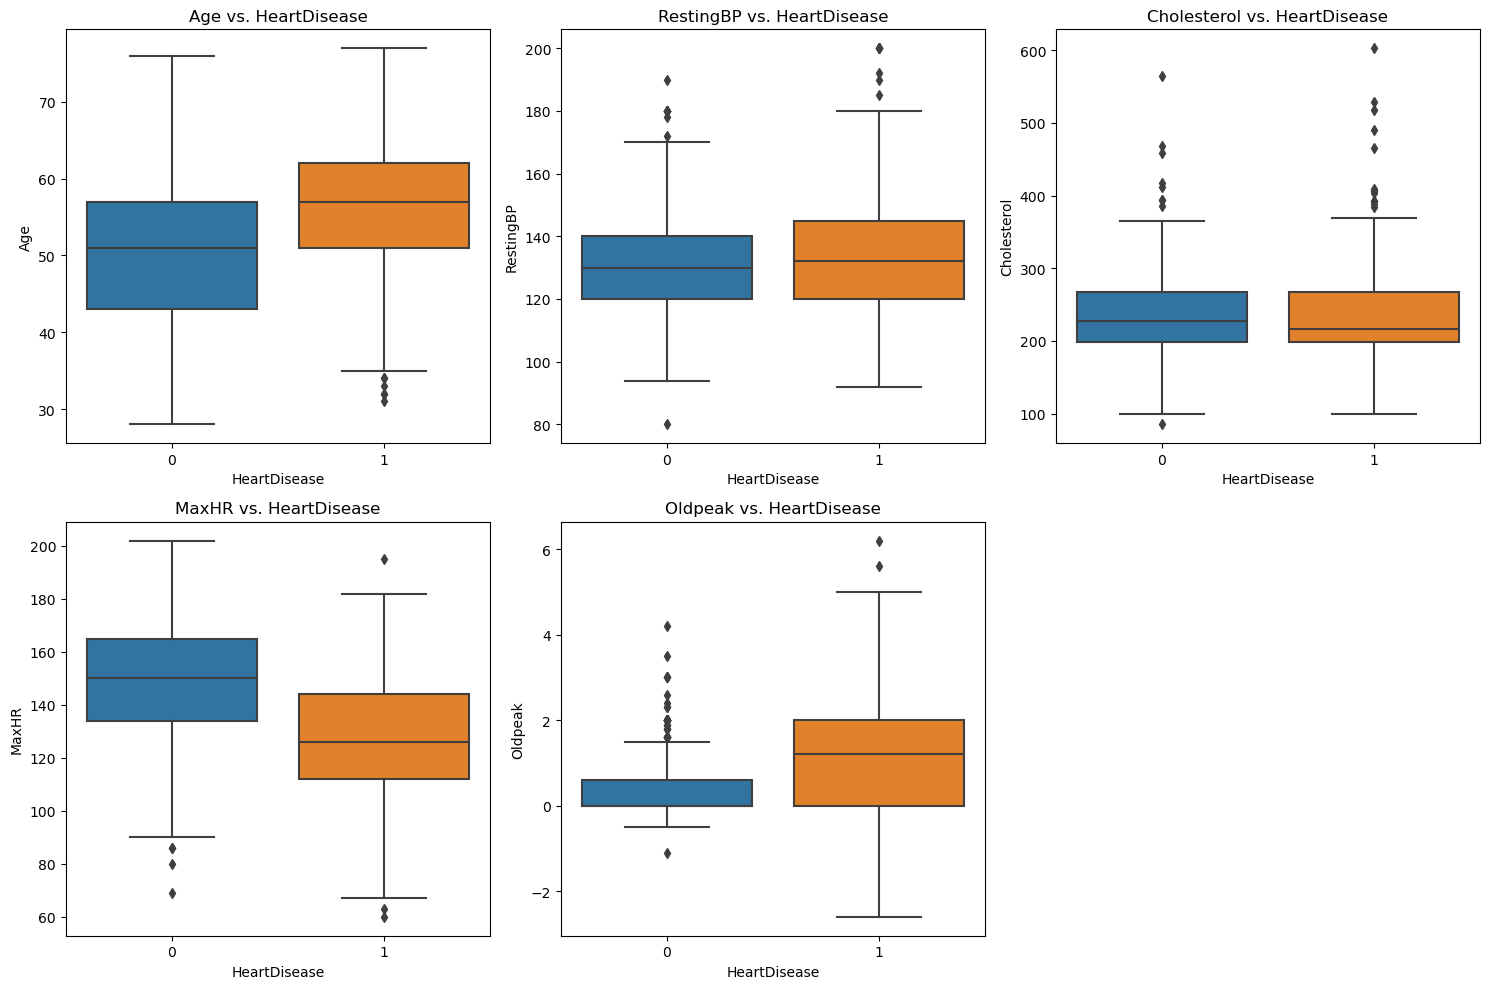

In [27]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
columns = ['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']
for i in range(2):
    for j in range(3):
        if columns:
            column = columns.pop(0)
            sns.boxplot(x='HeartDisease', y=column, data=df_fill, ax=axes[i, j])
            axes[i, j].set_title(f'{column} vs. HeartDisease')
        else:
            axes[i, j].remove()

plt.tight_layout()

C:\Users\suhaas rao s\AppData\Local\Temp\ipykernel_13336\4002512403.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_fill.corr(),annot=True)


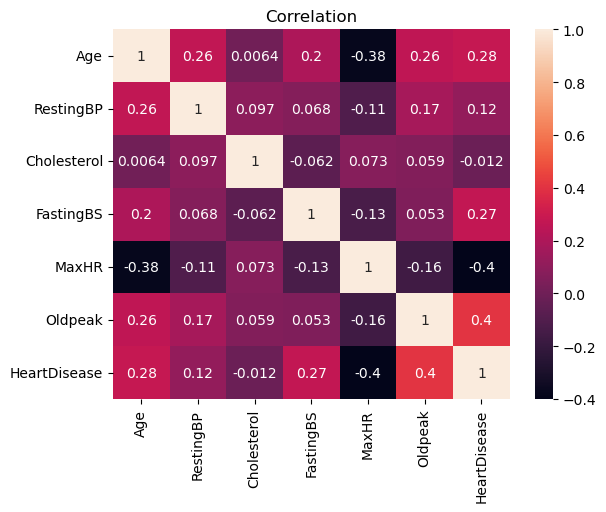

In [28]:
sns.heatmap(df_fill.corr(),annot=True)
plt.title('Correlation');

C:\Users\suhaas rao s\AppData\Local\Temp\ipykernel_13336\3408993579.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(abs(df_fill.corr()['HeartDisease']).to_frame(),annot=True)


<Axes: >

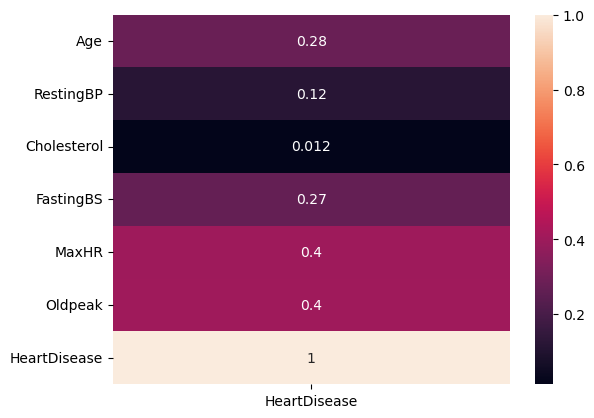

In [30]:
sns.heatmap(abs(df_fill.corr()['HeartDisease']).to_frame(),annot=True)

In [32]:
df_dummy = pd.get_dummies(df_fill,columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])

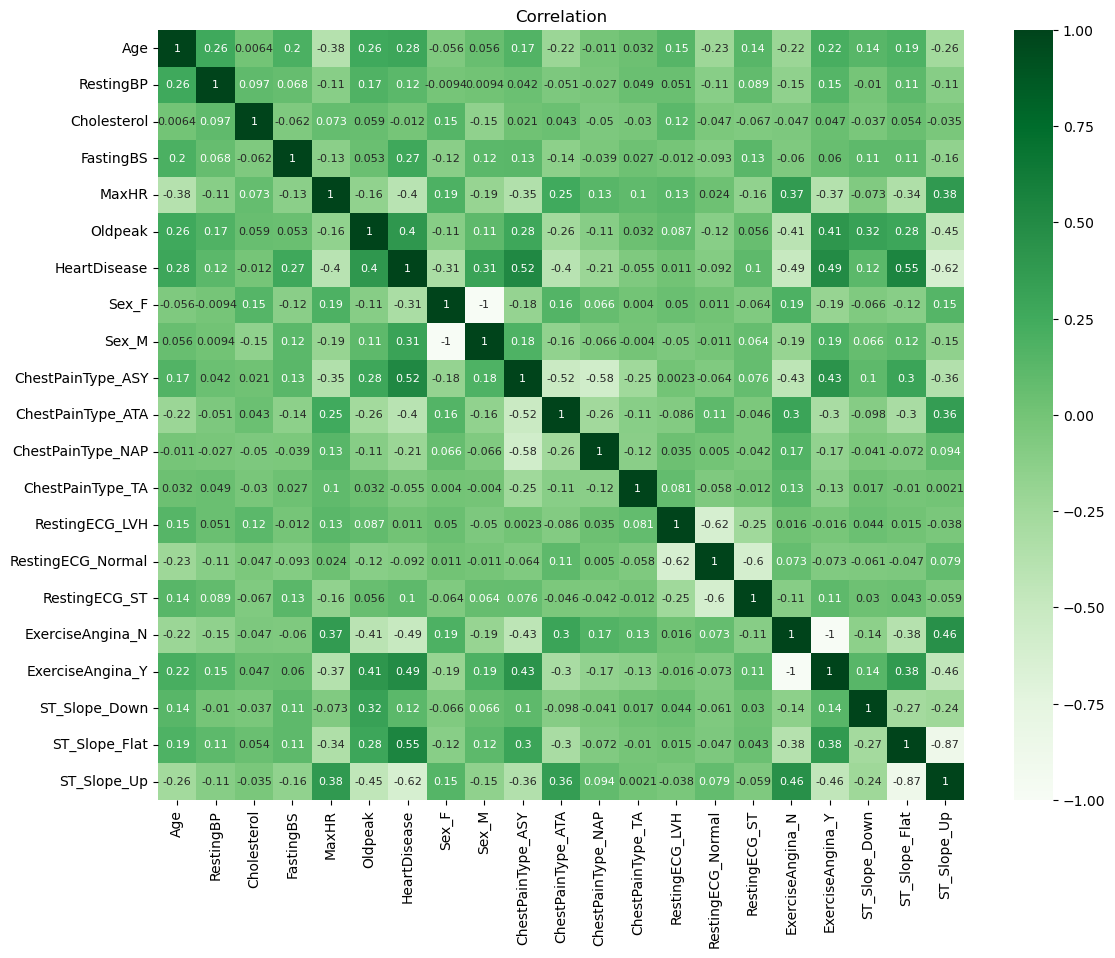

In [33]:
plt.figure(figsize=(13,10))
sns.heatmap(df_dummy.corr(), annot=True, annot_kws={"size": 8},cmap='Greens')
plt.title('Correlation');

In [35]:
abs(df_dummy.corr()['HeartDisease']).sort_values(ascending=False)

HeartDisease         1.000000
ST_Slope_Up          0.622164
ST_Slope_Flat        0.554134
ChestPainType_ASY    0.516716
ExerciseAngina_Y     0.494282
ExerciseAngina_N     0.494282
Oldpeak              0.403951
ChestPainType_ATA    0.401924
MaxHR                0.400421
Sex_M                0.305445
Sex_F                0.305445
Age                  0.282039
FastingBS            0.267291
ChestPainType_NAP    0.212964
ST_Slope_Down        0.122527
RestingBP            0.117930
RestingECG_ST        0.102527
RestingECG_Normal    0.091580
ChestPainType_TA     0.054790
Cholesterol          0.012340
RestingECG_LVH       0.010670
Name: HeartDisease, dtype: float64

Text(0.5, 1.0, 'Oldpeak vs Heartdisease')

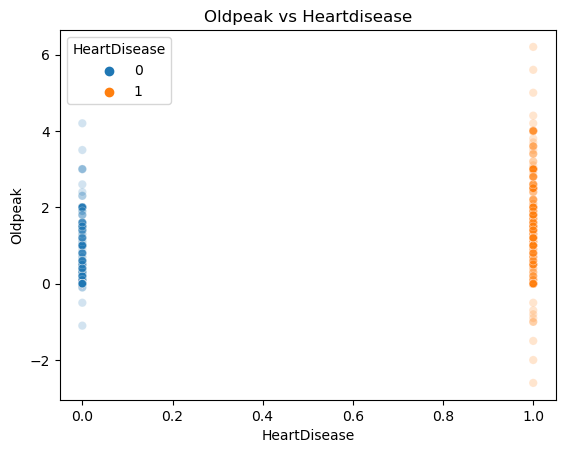

In [36]:
sns.scatterplot(x='HeartDisease',y='Oldpeak',data=df_dummy,hue='HeartDisease',alpha=0.2)
plt.title('Oldpeak vs Heartdisease')

Text(0.5, 1.0, 'Distribution of Oldpeak')

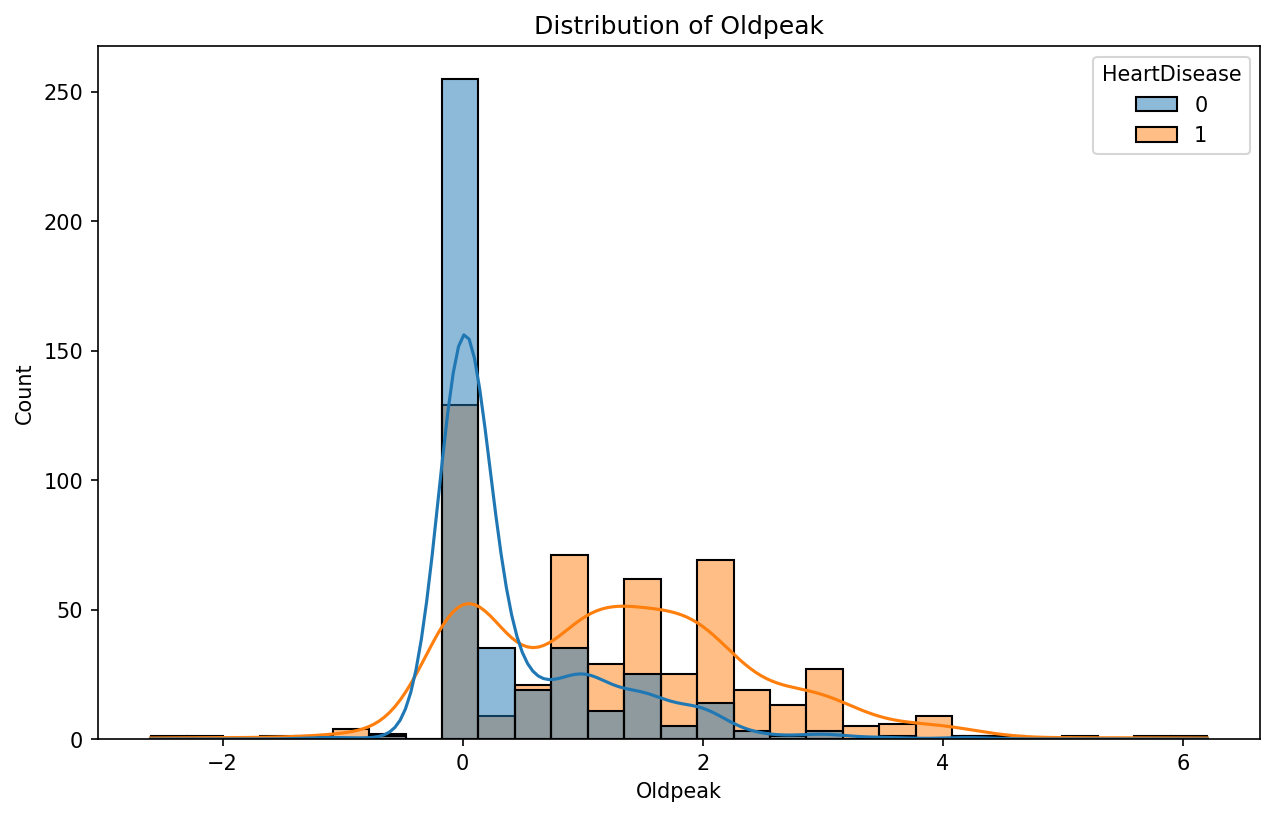

In [37]:
plt.figure(figsize=(10,6),dpi=150)
sns.histplot(x='Oldpeak',data=df_dummy,kde=True,hue='HeartDisease')
plt.title('Distribution of Oldpeak')

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = df_dummy.drop(['HeartDisease'],axis=1)
y = df_dummy['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(scaled_X_train,y_train)

KNeighborsClassifier()

In [41]:
y_pred = knn_model.predict(scaled_X_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,ConfusionMatrixDisplay
accuracy_score(y_test,y_pred)

0.855072463768116

In [42]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(knn_model, scaled_X_train, y_train, cv=5)

# Calculate mean and standard deviation of cross-validation scores
mean_accuracy = np.mean(cv_scores)
std_accuracy = np.std(cv_scores)

print("Cross-Validation Scores:", cv_scores)
print(f"Mean Accuracy: {mean_accuracy:.4f} +/- {std_accuracy:.4f}")

Cross-Validation Scores: [0.87596899 0.86821705 0.8515625  0.8359375  0.8125    ]
Mean Accuracy: 0.8488 +/- 0.0228


In [43]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[104,  22],
       [ 18, 132]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix')

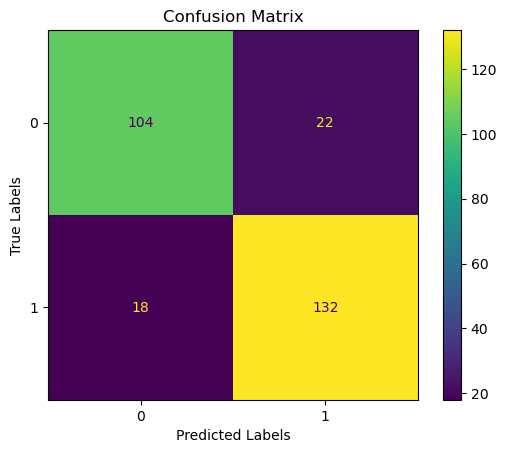

In [44]:
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       126
           1       0.86      0.88      0.87       150

    accuracy                           0.86       276
   macro avg       0.85      0.85      0.85       276
weighted avg       0.86      0.86      0.85       276



In [46]:
test_error_rates = []

for n in range(1,101):
  knn = KNeighborsClassifier(n_neighbors=n)
  knn.fit(scaled_X_train,y_train)
  y_pred = knn.predict(scaled_X_test)


  error = 1 - accuracy_score(y_test,y_pred)
  test_error_rates.append(error)

Text(0.5, 0, 'K Value')

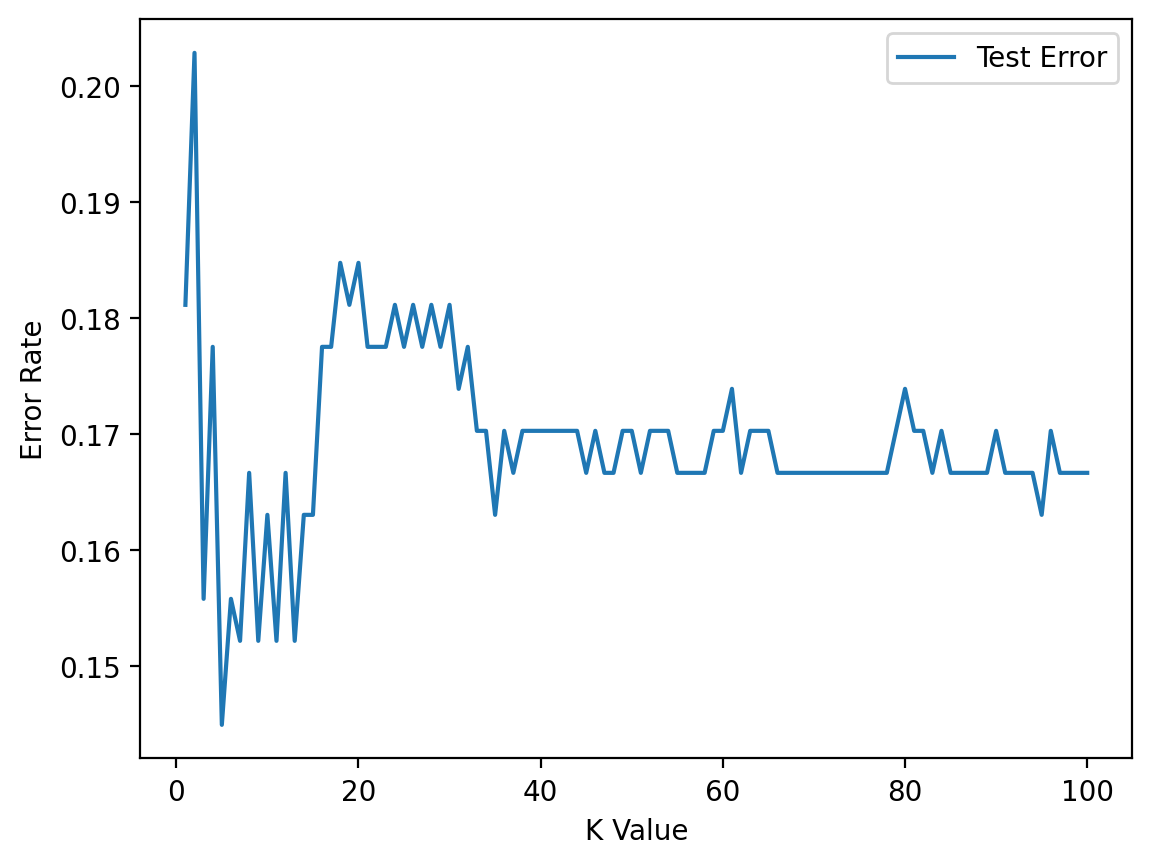

In [47]:
plt.figure(dpi=200)
plt.plot(range(1,101),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
# Define the parameters for grid search
param_grid = {
    'n_neighbors':[3, 5, 7, 9],  # Varying number of neighbors
    'weights': ['uniform', 'distance'],  # Different weighting schemes
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']  # Different algorithms
}
# Initialize KNN classifier
knn = KNeighborsClassifier()
# Create GridSearchCV object
grid_knn = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')
# Fit the grid search to your data
grid_knn.fit(scaled_X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [50]:
best_params = grid_knn.best_params_
best_knn = grid_knn.best_estimator_
predictions = best_knn.predict(scaled_X_test)
accuracy = accuracy_score(y_test, predictions)
print("Best Parameters:", best_params)
print('Accuracy: ', accuracy)

Best Parameters: {'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'distance'}
Accuracy:  0.8478260869565217


In [51]:
cm = confusion_matrix(y_test,predictions)
cm

array([[104,  22],
       [ 20, 130]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix')

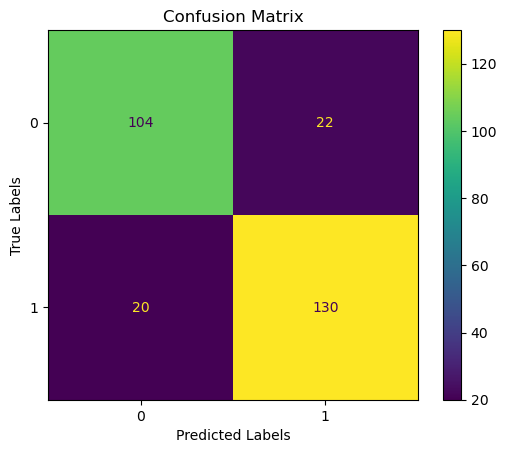

In [52]:
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

In [53]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83       126
           1       0.86      0.87      0.86       150

    accuracy                           0.85       276
   macro avg       0.85      0.85      0.85       276
weighted avg       0.85      0.85      0.85       276



In [54]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [55]:
base_pred = model.predict(X_test)

In [56]:
cm = confusion_matrix(y_test,base_pred)
cm

array([[ 97,  29],
       [ 34, 116]], dtype=int64)

In [57]:
accuracy_score(y_test,base_pred)

0.7717391304347826

In [58]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

           0       0.74      0.77      0.75       126
           1       0.80      0.77      0.79       150

    accuracy                           0.77       276
   macro avg       0.77      0.77      0.77       276
weighted avg       0.77      0.77      0.77       276



Text(0.5, 1.0, 'Confusion Matrix')

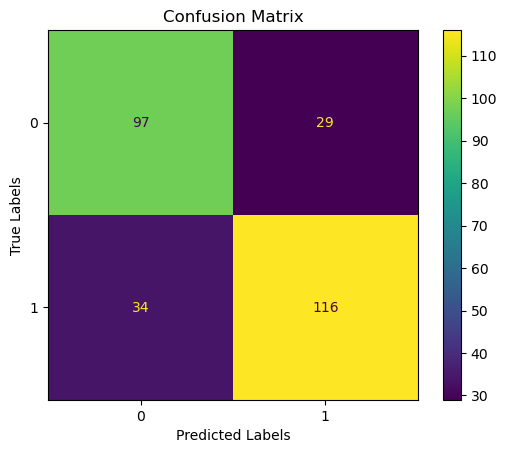

In [59]:
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

In [60]:
pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance'])

,Feature Importance
Age,0.043595
RestingBP,0.067135
Cholesterol,0.055824
FastingBS,0.043808
MaxHR,0.121195
Oldpeak,0.061524
Sex_F,0.000000
Sex_M,0.045969
ChestPainType_ASY,0.097449
ChestPainType_ATA,0.000000


In [61]:
tree_classifier = DecisionTreeClassifier()
# Define the hyperparameters grid for grid search
param_grid = {
    'max_depth': [None, 5, 10, 15],  # Varying maximum depth of the tree
    'min_samples_split': [2, 5, 10, 15],  # Varying min samples required to split a node
    'min_samples_leaf': [1, 2, 4, 6]  # Varying min samples required at each leaf node
}
# Create a GridSearchCV object
grid_tree = GridSearchCV(tree_classifier, param_grid, cv=5, scoring='accuracy')
# Fit the grid search to the data
grid_tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'min_samples_split': [2, 5, 10, 15]},
             scoring='accuracy')

In [62]:
best_params = grid_tree.best_params_
best_dt = grid_tree.best_estimator_
predictions = best_dt.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Best Parameters:", best_params)
print('Accuracy: ', accuracy)

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}
Accuracy:  0.8442028985507246


In [63]:
cm = confusion_matrix(y_test,predictions)
cm

array([[109,  17],
       [ 26, 124]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix')

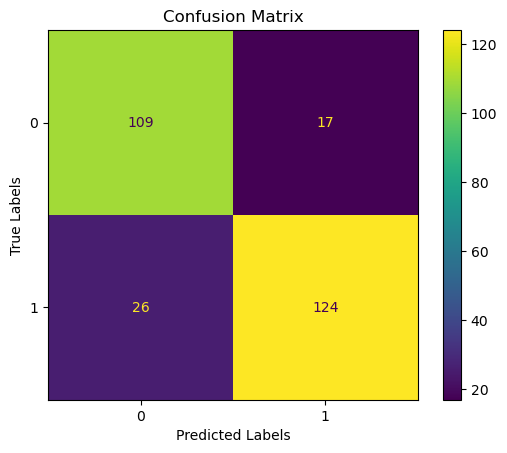

In [64]:
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

In [65]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       126
           1       0.88      0.83      0.85       150

    accuracy                           0.84       276
   macro avg       0.84      0.85      0.84       276
weighted avg       0.85      0.84      0.84       276



In [66]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10,max_features='auto',random_state=54)
model.fit(X_train,y_train)

C:\Users\suhaas rao s\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_features='auto', n_estimators=10, random_state=54)

In [67]:
preds = model.predict(X_test)

In [68]:
accuracy_score(y_test,preds)

0.8369565217391305

In [69]:
test_error = []

for n in range(1,40):
    # Use n random trees
    model = RandomForestClassifier(n_estimators=n,max_features='auto',random_state=54)
    model.fit(X_train,y_train)
    test_preds = model.predict(X_test)
    test_error.append(1-accuracy_score(test_preds,y_test))

C:\Users\suhaas rao s\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\suhaas rao s\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\suhaas rao s\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also t

C:\Users\suhaas rao s\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\suhaas rao s\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\suhaas rao s\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also t

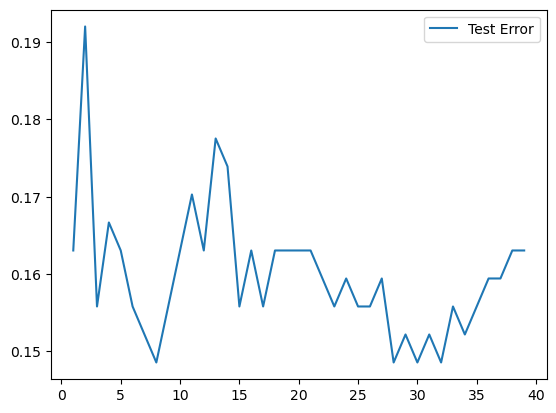

In [70]:
plt.plot(range(1,40),test_error,label='Test Error')
plt.legend()

(1.0, 20.0)

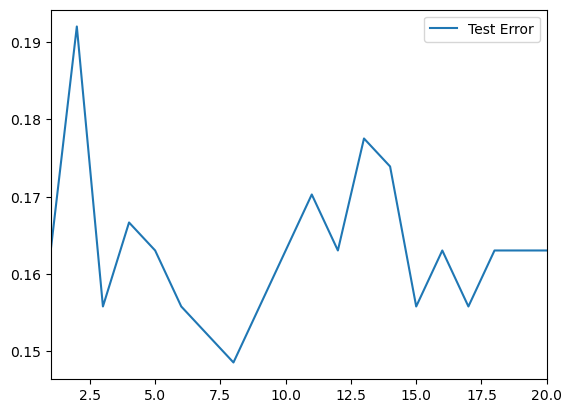

In [71]:
plt.plot(range(1,40),test_error,label='Test Error')
plt.legend()
plt.xlim(1,20)

In [72]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=8,max_features='auto',random_state=54)
model.fit(X_train,y_train)

C:\Users\suhaas rao s\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_features='auto', n_estimators=8, random_state=54)

In [73]:
preds = model.predict(X_test)

In [74]:
accuracy_score(y_test,preds)

0.8514492753623188

In [75]:
cm = confusion_matrix(y_test,preds)
cm

array([[110,  16],
       [ 25, 125]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix')

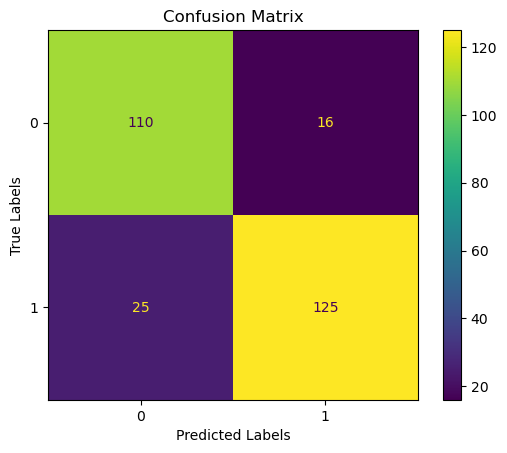

In [76]:
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

In [77]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       126
           1       0.89      0.83      0.86       150

    accuracy                           0.85       276
   macro avg       0.85      0.85      0.85       276
weighted avg       0.85      0.85      0.85       276



In [78]:
n_estimators = [64,100,128,200]
max_features = ['auto', 'sqrt', 'log2']
bootstrap = [True, False]
oob_score = [True, False]

param_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'bootstrap': bootstrap,
    'oob_score': oob_score,
     'random_state': [54]
}

rfc = RandomForestClassifier()
grid_forest = GridSearchCV(rfc,param_grid)


grid_forest.fit(X_train,y_train)

C:\Users\suhaas rao s\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\suhaas rao s\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\suhaas rao s\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also t

C:\Users\suhaas rao s\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\suhaas rao s\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\suhaas rao s\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also t

C:\Users\suhaas rao s\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\suhaas rao s\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\suhaas rao s\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also t

C:\Users\suhaas rao s\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\suhaas rao s\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\suhaas rao s\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also t

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False], 'random_state': [54]})

In [79]:
predictions = grid_forest.predict(X_test)

In [80]:
accuracy_score(y_test,predictions)

0.8442028985507246

In [81]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       126
           1       0.86      0.85      0.86       150

    accuracy                           0.84       276
   macro avg       0.84      0.84      0.84       276
weighted avg       0.84      0.84      0.84       276



In [82]:
cm = confusion_matrix(y_test,predictions)
cm

array([[105,  21],
       [ 22, 128]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix')

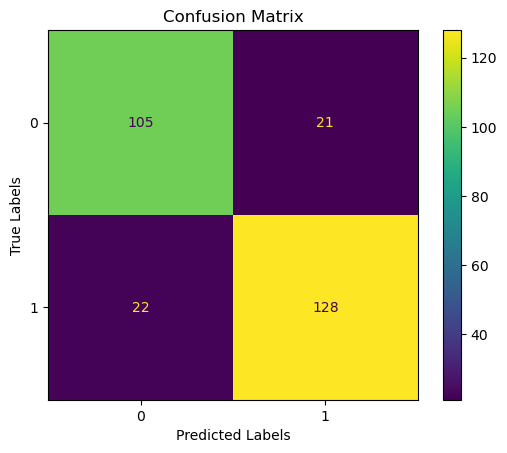

In [83]:
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

In [84]:
best_params = grid_forest.best_params_
best_rf = grid_forest.best_estimator_
predictions = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Best Parameters:", best_params)
print('Accuracy: ', accuracy)

Best Parameters: {'bootstrap': False, 'max_features': 'auto', 'n_estimators': 100, 'oob_score': False, 'random_state': 54}
Accuracy:  0.8442028985507246


In [85]:
from sklearn.linear_model import LogisticRegression

In [86]:
log_model = LogisticRegression()

In [87]:
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

In [88]:
y_pred = log_model.predict(scaled_X_test)

In [89]:
accuracy_score(y_test,y_pred)

0.8297101449275363

In [90]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[100,  26],
       [ 21, 129]], dtype=int64)

In [91]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       126
           1       0.83      0.86      0.85       150

    accuracy                           0.83       276
   macro avg       0.83      0.83      0.83       276
weighted avg       0.83      0.83      0.83       276



Text(0.5, 1.0, 'Confusion Matrix')

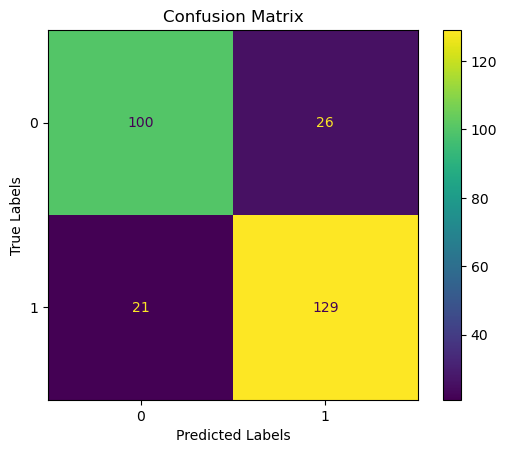

In [92]:
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

In [93]:
param_grid = {
    'penalty': ['l1', 'l2'],  # Regularization type
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength

    'solver': ['liblinear', 'saga']  # Algorithm to use in optimization problem
}

logistic = LogisticRegression(max_iter=10000)

grid_search = GridSearchCV(logistic, param_grid, cv=5, scoring='accuracy')


grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


best_model_log = grid_search.best_estimator_
predictions = best_model_log.predict(X_test)


accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Best Hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 0.8405797101449275


In [94]:
cm = confusion_matrix(y_test,predictions)
cm

array([[101,  25],
       [ 19, 131]], dtype=int64)

In [95]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82       126
           1       0.84      0.87      0.86       150

    accuracy                           0.84       276
   macro avg       0.84      0.84      0.84       276
weighted avg       0.84      0.84      0.84       276



Text(0.5, 1.0, 'Confusion Matrix')

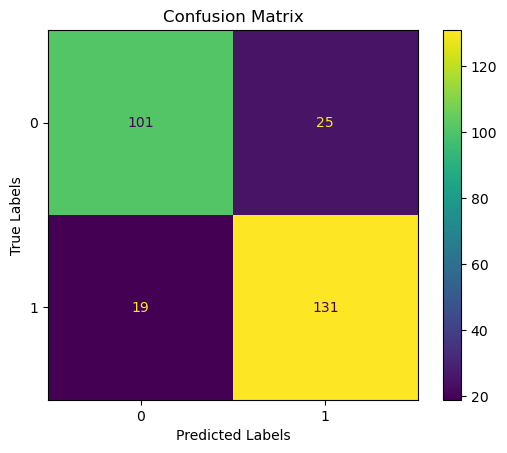

In [96]:
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

In [97]:
from sklearn.metrics import precision_recall_curve

Text(0.5, 1.0, 'Precision-Recall curve for HeartDisease present')

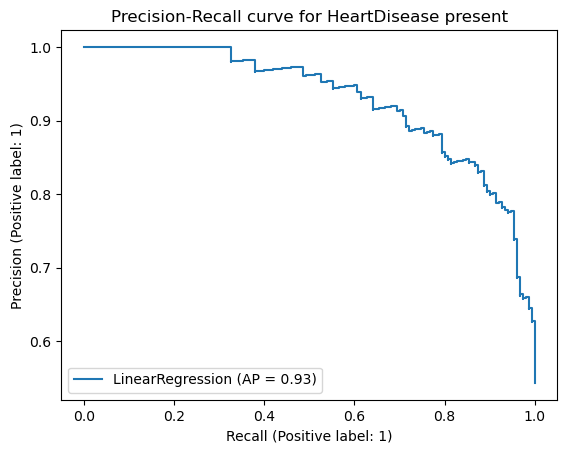

In [98]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(best_model_log, X_test, y_test, name="LinearRegression")
display.ax_.set_title("Precision-Recall curve for HeartDisease present")

In [99]:
from sklearn.metrics import RocCurveDisplay

Text(0.5, 1.0, 'ROC Curve for HeartDisease-present')

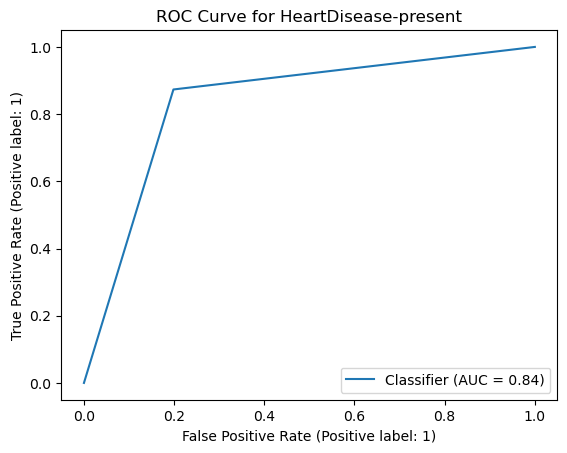

In [100]:
RocCurveDisplay.from_predictions(y_test, predictions)
plt.title('ROC Curve for HeartDisease-present')

In [101]:
df_dummy.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_F', 'Sex_M', 'ChestPainType_ASY',
       'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_N', 'ExerciseAngina_Y', 'ST_Slope_Down',
       'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [102]:
example = pd.DataFrame({
    'Age':[58],
    'RestingBP':[180],
    'Cholesterol':[214],
    'FastingBS':[0],
    'MaxHR':[156],
    'Oldpeak':[2.0],
    'Sex_F':[0],
    'Sex_M':[1],
    'ChestPainType_ASY':[1],
    'ChestPainType_ATA':[0],
    'ChestPainType_NAP':[0],
    'ChestPainType_TA':[0],
    'RestingECG_LVH':[0],
    'RestingECG_Normal':[1],
    'RestingECG_ST':[0],
    'ExerciseAngina_N':[0],
    'ExerciseAngina_Y':[1],
    'ST_Slope_Down':[0],
    'ST_Slope_Flat':[1],
    'ST_Slope_Up':[1]

})

In [103]:
predction = best_knn.predict(example)
if predction[0]==1:
  print('Has Heart disease')
else:
  print('Does not has heart disease')

Has Heart disease


C:\Users\suhaas rao s\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [104]:
predction = best_model_log.predict(example)
if predction[0]==1:
  print('Has Heart disease')
else:
  print('Does not has heart disease')

Has Heart disease


In [105]:
predction = best_dt.predict(example)
if predction[0]==1:
  print('Has Heart disease')
else:
  print('Does not has heart disease')

Has Heart disease


In [106]:
predction = best_rf.predict(example)
if predction[0]==1:
  print('Has Heart disease')
else:
  print('Does not has heart disease')

Has Heart disease


In [107]:
example2 = pd.DataFrame({
    'Age':[37],
    'RestingBP':[130],
    'Cholesterol':[283],
    'FastingBS':[0],
    'MaxHR':[98],
    'Oldpeak':[0.0],
    'Sex_F':[0],
    'Sex_M':[1],
    'ChestPainType_ASY':[0],
    'ChestPainType_ATA':[1],
    'ChestPainType_NAP':[0],
    'ChestPainType_TA':[0],
    'RestingECG_LVH':[0],
    'RestingECG_Normal':[0],
    'RestingECG_ST':[1],
    'ExerciseAngina_N':[1],
    'ExerciseAngina_Y':[0],
    'ST_Slope_Down':[0],
    'ST_Slope_Flat':[0],
    'ST_Slope_Up':[1]

})

In [108]:
predction = best_knn.predict(example2)
if predction[0]==1:
  print('Has Heart disease')
else:
  print('Does not has heart disease')

C:\Users\suhaas rao s\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


Has Heart disease


In [109]:
predction = best_model_log.predict(example2)
if predction[0]==1:
  print('Has Heart disease')
else:
  print('Does not has heart disease')

Does not has heart disease


In [110]:
predction = best_dt.predict(example2)
if predction[0]==1:
  print('Has Heart disease')
else:
  print('Does not has heart disease')

Does not has heart disease


In [111]:
predction = best_rf.predict(example2)
if predction[0]==1:
  print('Has Heart disease')
else:
  print('Does not has heart disease')

Does not has heart disease
